# Introducción a R, parte 3

Bioinformática para Antropología

Para concluir la familiarización con R, vamos a repasar conceptos de estadística y probabilidad con nuestra tabla de datos. El primer paso es cargar y limpiar la tabla nuevamente:

In [1]:
cuest <- read.table("cuestionario.csv", sep=',', header=T)

In [2]:
cuest$Timestamp <- NULL

In [3]:
cuest[1,3] <- 27

In [4]:
cuest[2,3] <- 27

In [5]:
cuest[3,3] <- 25.5

In [6]:
cuest.f <- cuest[c(-21,-22,-23,-27,-29,-33),]

In [7]:
cuest <- cuest.f

In [8]:
str(cuest)

'data.frame':	28 obs. of  4 variables:
 $ Edad.en.años.                   : int  30 29 29 28 30 29 29 20 39 49 ...
 $ Estatura.en.centímetros.        : num  190 170 166 184 167 180 175 160 155 186 ...
 $ Talla.de.calzado.en.centímetros.: num  27 27 25.5 28 27.5 28 28.5 23 23 28 ...
 $ X.Le.gusta.la.pizza.con.piña.   : Factor w/ 2 levels "No","Si": 1 1 2 2 2 2 2 1 2 2 ...


Los objetos o variables que existen en la sesión de trabajo están guardados en el *ambiente* de R y la lista de estas variables se puede consultar con la función *ls()*:

In [9]:
ls()

[1] "cuest"   "cuest.f"

En general, cuando trabajamos en la consola de R, podemos guardar el ambiente con la función *save.image()* que guarda las variables en un archivo llamado *.RData* en nuestro directorio actual:

In [10]:
save.image()

Posteriormente es posible recuperar nuestras variables con la función *load()* sin la necesidad de volver a cargar y limpiar la tabla de nuevo:

In [1]:
load(".RData")

In [2]:
ls()

[1] "cuest"   "cuest.f"

In [3]:
str(cuest)

'data.frame':	28 obs. of  4 variables:
 $ Edad.en.años.                   : int  30 29 29 28 30 29 29 20 39 49 ...
 $ Estatura.en.centímetros.        : num  190 170 166 184 167 180 175 160 155 186 ...
 $ Talla.de.calzado.en.centímetros.: num  27 27 25.5 28 27.5 28 28.5 23 23 28 ...
 $ X.Le.gusta.la.pizza.con.piña.   : Factor w/ 2 levels "No","Si": 1 1 2 2 2 2 2 1 2 2 ...


A veces necesitamos guardar una tabla para cargarla en otro programa como excel y para este fin el archivo .RData es inutil (ya que es un archivo binario que solo puede leer R) de forma que es necesario guardar la tabla en otro formato, por ejemplo csv. Esto se puede lograr con la función *write.table()*:

In [4]:
write.table(cuest, file = "cuestionario_definitivo.csv", quote = F, sep = ",", row.names = F, col.names = T)

El primer argumento es la tabla a guardar, el segundo el nombre que queremos darle al archivo, el tercero define si el texto como los nombres de las columnas o los factores va a ir encerrado entre comillas, el cuarto establece el separador de columnas, en el quinto argumento estamos diciendo que no queremos guardar los nombres de las filas y en el último argumento declaramos que si queremos guardar los nombres de las columnas. Este nuevo archivo lo podemos volver a cargar en otra ocasión para recuperar nuestros datos:

In [5]:
cuest_def <- read.table("cuestionario_definitivo.csv", sep = ",", header = T)

In [6]:
str(cuest_def)

'data.frame':	28 obs. of  4 variables:
 $ Edad.en.años.                   : int  30 29 29 28 30 29 29 20 39 49 ...
 $ Estatura.en.centímetros.        : int  190 170 166 184 167 180 175 160 155 186 ...
 $ Talla.de.calzado.en.centímetros.: num  27 27 25.5 28 27.5 28 28.5 23 23 28 ...
 $ X.Le.gusta.la.pizza.con.piña.   : Factor w/ 2 levels "No","Si": 1 1 2 2 2 2 2 1 2 2 ...


El vector de la estatura cambió de tipo ya que después de limpiarlo solo incluye números enteros.

Un concepto básico de estadística es el de las medidas de tendencia central que son varios índices que nos describen la distribución de nuestros datos. Si llamamos a la función *summary()* sobre un dataframe, se calculan estas medidas por cada vector de datos:

In [7]:
summary(cuest_def)

 Edad.en.años.   Estatura.en.centímetros. Talla.de.calzado.en.centímetros.
 Min.   :20.00   Min.   :155.0            Min.   :23.00                   
 1st Qu.:29.00   1st Qu.:165.8            1st Qu.:26.38                   
 Median :31.00   Median :172.0            Median :27.00                   
 Mean   :33.54   Mean   :173.0            Mean   :26.75                   
 3rd Qu.:36.75   3rd Qu.:180.2            3rd Qu.:27.62                   
 Max.   :59.00   Max.   :192.0            Max.   :30.00                   
 X.Le.gusta.la.pizza.con.piña.
 No: 7                        
 Si:21                        
                              
                              
                              
                              

Una manera gráfica de analizar la distribución de nuestros datos es un histograma. Volvamos a graficarlos para nuestros vectores numéricos, usando la función *par()* para graficar los tres histogramas en una figura y la función *options()* para establecer las dimensiones de la figura:

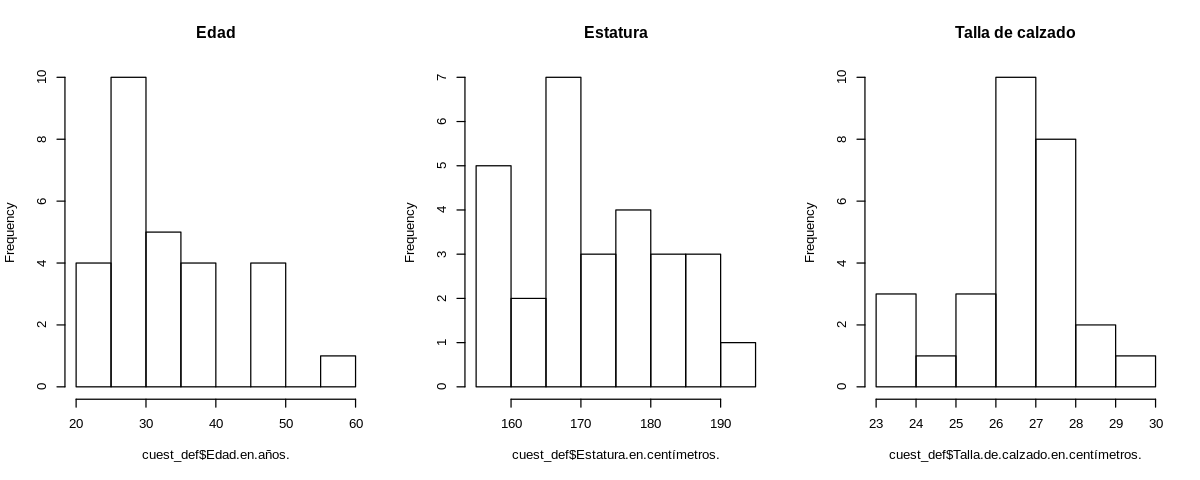

In [8]:
options(repr.plot.width=10, repr.plot.height=4)
par(mfrow=c(1,3))
hist(cuest_def$Edad.en.años., main="Edad")
hist(cuest_def$Estatura.en.centímetros., main="Estatura")
hist(cuest_def$Talla.de.calzado.en.centímetros., main="Talla de calzado")

Los histogramas muestran en el eje *y* la frecuencia de las observaciones dentro de cada intervalo de clase y en el eje *x* el espacio muestral (el rango de todos los valores observados) dividido en intervalos. Observando brevemente estos histogramas, parece que la talla de calzado tiene una distribución normal, ya que su distribución asemeja una campana.

La distribución normal es simplemente una distribución en donde la media es igual a la moda y el 68.27% de las observaciones se encuentran a +/- una desviación estándar de la media. Esta distribución se usa mucho ya que se ha visto consistentemente que sin importar la distribución de cierta variable en una población, al tomar varias muestras, la distribución de las medias de estas muestras tienen una distribución normal. El teorema del límite central describe formalmente este fenómeno.

Para representar distribuciones, existen notaciones particulares que indican los parámetros que definen la forma de la distribución y la notación de la distribución normal es la siguiente:

N(u, s²)

En donde *u* es la media y *s²* es la varianza (igual a la desviación estándar al cuadrado). Un caso particular de la distribución normal es la llamada *normal estándar* que tiene esta notación:

N(0, 1)

Que nos indica que en la normal estándar la media es cero y la varianza es 1. Es posible graficar la *función de densidad de probabilidad* de una distribución teniendo los parámetros que la definen. La función de densidad de la distribución normal que vamos a usar es:

```(exp((-(x-u)**2/(2*(s**2)))))/((s*sqrt(2*pi)))```

Usemos esta expresión para graficar la distribución normal estándar con la función *curve()* que toma como argumentos una función, el valor mínimo en x y el valor máximo en x a graficar:

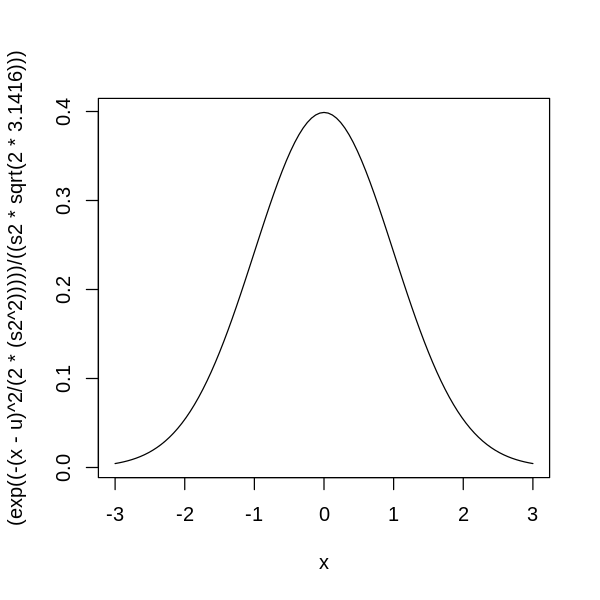

In [9]:
options(repr.plot.width=5, repr.plot.height=5)
s2 = 1
u = 0
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),-3,3)

Esta gráfica nos muestra cómo es que la probabilidad de observar valores dentro de este espacio muestral aumenta alrededor de la media. Hay que recordar que como estamos trabajando con probabilidades, la suma de todos los posibles resultados debe ser igual a 1, en este caso, el área bajo la curva de esta gráfica debería dar 1 si pudiéramos extender el rango de la gráfica hacia el infinito negativo y positivo.

La distribución normal se puede graficar en términos de una recta ya que es una *distribución continua*, o sea que puede haber un número infinito de valores entre cada par de valores del espacio muestral. Si estuviésemos trabajando con una *distribución discreta*, como la distribución Poisson, sería absurdo representarla en términos de una recta y en su lugar tendríamos que usar gráficas de barras.

Gracias a que la variable de talla de calzado se encuentra en escala continua (tenemos valores decimales), podemos graficar su función de densidad de probabilidad según la distribución normal. Con tal fin, vamos a calcular los parámetros de la distribución, la media y la varianza con las funciones *mean()* y *sd()*, para la media y la desviación estándar, respectivamente:

In [10]:
mean(cuest_def$Talla.de.calzado.en.centímetros.)

[1] 26.75

In [11]:
sd(cuest_def$Talla.de.calzado.en.centímetros.)

[1] 1.652719

Vara obtener la varianza, elevamos la desviación estándar al cuadrado:

In [12]:
sd(cuest_def$Talla.de.calzado.en.centímetros.)**2

[1] 2.731481

Ahora solo queda sustituir los valores en la expresión anterior y ajustar el intervalo del espacio muestral a graficar de manera automática estableciendo los extremos como la media +/- tres veces la varianza:

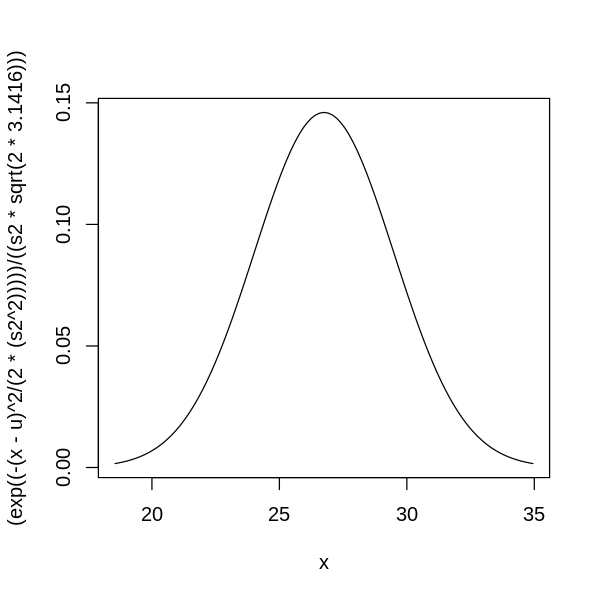

In [13]:
s2 = sd(cuest_def$Talla.de.calzado.en.centímetros.)**2
u = mean(cuest_def$Talla.de.calzado.en.centímetros.)
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),u-s2*3,u+s2*3)

Suponiendo que nuestros datos tienen una distribución normal, es posible calcular la probabilidad (es decir, el área bajo esta curva) de observar valores mayores o menores que cierto valor en nuestro espacio muestral. Recordemos que no es posible obtener la probabilidad de un valor en la escala contínua ya que siempre va a ser cero. Para calcular el área bajo la curva, podemos usar la función *pnorm()* a la cual le tenemos que dar como argumentos el cuantil (valor en x), la media, la desviación estándar de nuestra curva normal y en el cuarto argumento establecemos si queremos el área bajo la curva del lado izquierdo (TRUE) o del lado derecho (FALSE).

Primero veamos la probabilidad de observar un valor menor a la media (espero que puedan predecir el resultado antes de verlo):

In [14]:
pnorm(26.75, u, sqrt(s2), T)

[1] 0.5


Para hacer más claro lo que estamos haciendo vamos a describirlo gráficamente poniendo dos puntos sobre los cuantiles que definen la densidad de probabilidad con la función *points* que tiene como argumentos los valores a graficar en x, los valores a graficar en y, el color de los puntos y la forma de los puntos:

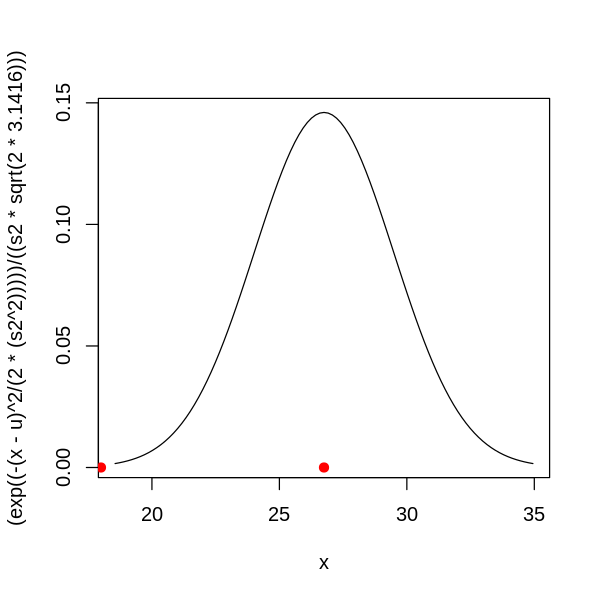

In [15]:
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),u-s2*3,u+s2*3)
points(c(18,26.75),c(0,0), col='red',pch=19)

La expresión

```pnorm(26.75, u, sqrt(s2), T)``` 

nos calculó el área bajo la curva entre los dos puntos rojos (aproximadamente, ya que se pasó del x=18 y se fue hasta menos infinito).

Ahora veamos la probabilidad de encontrar a alguien que tenga talla 28 o mayor en nuestra población:

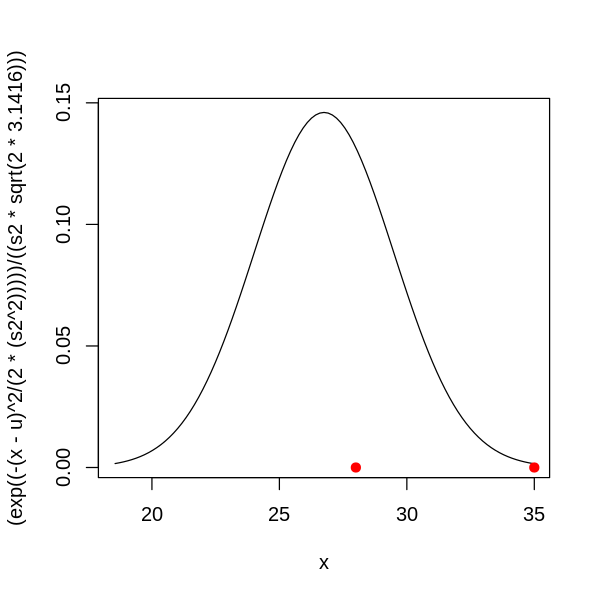

In [16]:
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),u-s2*3,u+s2*3)
points(c(28,35),c(0,0), col='red',pch=19)

In [17]:
pnorm(28, u, sqrt(s2), F)

[1] 0.2247259

Este resultado indica que hay una probabilidad de 0.22 (también dicho del 22%) de observar a alguien que tenga el pie de 28 cm si perteneciera a la población muestreada.

Siguiendo esta misma lógica, podemos hacer *pruebas de hipótesis* en las cuales vamos a preguntarnos si un valor pertenece o no a nuestra población. Para ello, tengo que establecer mis hipótesis:

Ho (hipótesis nula): el valor pertenece a mi población

Ha (hipótesis alternativa): el valor no pertenece a mi población

de hecho, puedo ser más específico con la Ha

Ha$_{1}$: el valor es demasiado pequeño como para ser de la población

Ha$_{2}$: el valor es demasiado grande como para ser de la población


Dado que el dominio de la curva normal va de menos infinito a más infinito, la probabilidad de observar valores dentro de cierto rango siempre va a ser mayor a cero (por más pequeña que sea la probabilidad). Por lo tanto, tenemos que definir el *intervalo de confianza* de la prueba que vamos a hacer. El intervalo de confianza de nuestro espacio muestral determina los límites del intervalo de valores que pertenecen a la distribución de nuestra población con base en la probabilidad de observar valores dentro de este intervalo.

En este caso, para verificar Ha$_{1}$ y Ha$_{2}$ se hacen pruebas de una cola, ya que solo tenemos que solo me interesa establecer el intervalo de un lado de la curva. Al contrario, para validar Ha, tengo que hacer una prueba a dos colas, ya que tengo que revisar si el valor es demasiado grande o demasiado chico al mismo tiempo.

Para definir cuantiles con base en probabilidades podemos usar la función *qnorm()* que recibe como argumentos al área bajo la curva (probabilidad) acumulada, la media, la desviación estándar y de nuevo si queremos que la acumulación sea desde el lado izquierdo (TRUE) o derecho (FALSE). 

Veamos el valor en x (cuantil) que define una probabilidad de 0.5 desde menos infinito (de nuevo, espero que ya sepan la respuesta):

In [18]:
qnorm(0.5,u, sqrt(s2), T)

[1] 26.75

Es correcto, la media es el límite superior del intervalo que acumula una probabilidad de 0.5 desde menos infinito.

Digamos que queremos saber el intervalo de confianza de las tallas de calzado con 0.90 de probabilidad. Hay varias formas de determinar este intervalo: primero tenemos el intervalo a una cola desde menos infinito:

In [19]:
qnorm(0.90,u, sqrt(s2), T)

[1] 28.86805

En segundo lugar podemos calcular el intervalo desde más infinito:

In [20]:
qnorm(0.90,u, sqrt(s2), F)

[1] 24.63195

Estos dos valores nos dan los intervalos de confianza del 90% a una cola. 

En tercer lugar está el intervalo al 90% a dos colas, o sea que no nos vamos a extender al infinito, sino que queremos los dos cuantiles que definen la probabilidad de 0.90 alrededor de la media. Para ello, vamos a calcular los cuantiles al 95% de confianza en para cada una de las dos colas:

In [21]:
qnorm(0.95,u, sqrt(s2), T)

[1] 29.46848

In [22]:
qnorm(0.95,u, sqrt(s2), F)

[1] 24.03152

Vamos a revisar lo que hicimos de manera gráfica:

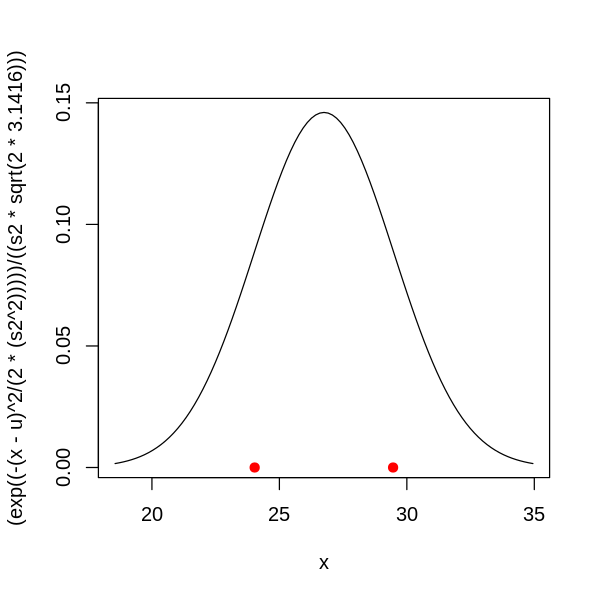

In [23]:
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),u-s2*3,u+s2*3)
points(c(24.03,29.46),c(0,0), col='red',pch=19)

Los dos puntos están delimitando el intervalo alrededor de la media que acumula una probabilidad de 0.9 (o bien del 90%). A la probabilidad restante se le conoce como significancia o *alfa*, de manera que si mi intervalo de confianza está definido con una probabilidad de 0.9, alfa tiene un valor de:

In [24]:
1 - 0.9

[1] 0.1

Esto en el caso de estar haciendo una prueba a una cola, si mi prueba es a dos colas, tengo que dividir alfa entre dos, ya que está repartida entre los dos extremos del intervalo:

In [25]:
(1 - 0.9) / 2

[1] 0.05

Por lo tanto mi alfa es de 0.05 si hago  una prueba a dos colas. Una vez que se tienen los intervalos de confianza, es muy sencillo hacer la prueba de hipótesis, solo tengo que comparar el valor en cuestión con los límites de mi intervalo de confianza.

Digamos que quiero saber si Gwendoline Christie podría pertenecer a nuestra población de tallas de calzado. Primero lo voy a verificar de forma gráfica poniendo un punto azul en el valor de su talla (30 cm) en nuestra curva con intervalos de confianza a dos colas:

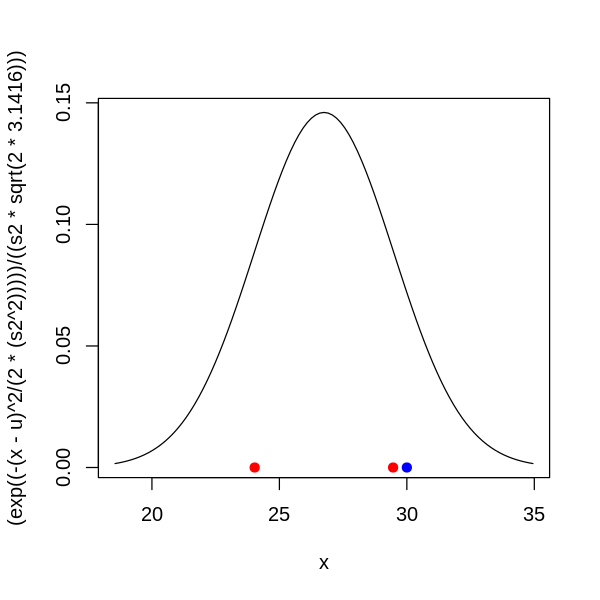

In [26]:
curve((exp((-(x-u)**2/(2*(s2**2)))))/((s2*sqrt(2*3.1416))),u-s2*3,u+s2*3)
points(c(24.03,29.46),c(0,0), col='red',pch=19)
points(c(30),c(0), col='blue',pch=19)

De manera gráfica, podemos decir con un 90% de confianza que la talla de calzado de Gwendoline Christie no pertenece a nuestra población, o sea que rechazamos la hipótesis nula (Ho).

Ahora veamos la probabilidad de encontrar a alguien con una talla de calzado mayor o igual a la de Gwendoline Christie en nuestra población:

In [27]:
pnorm(30, u, sqrt(s2), F)

[1] 0.02462298

Como esta probabilidad es menor que nuestra alfa (0.05), podemos decir que nuestra prueba de hipótesis es significativa.

De hecho, este valor es conocido como **valor p** (p-value en inglés) y se le define como la probabilidad de equivocarnos si rechazamos la hipótesis nula. 

Esto es porque en la hipótesis nula estamos diciendo que el valor en cuestión pertenece a la población y por ende estamos calculando la probabilidad de encontrarlo en la misma población. Si la probabilidad de encontrar cierto valor en la población es mayor a alfa (o bien, el valor aparece dentro del intervalo de confianza en una gráfica), se dice que el resultado no es significativo y no es posible rechazar la hipótesis nula.

Cuanto más estricta queremos que sea una prueba, el valor de probabilidad que abarca el intervalo de confianza debe ser mayor.

Este es el racional de prácticamente todas las pruebas de hipótesis paramétricas de estadística frecuentista (es decir, estadística clásica) solo que en vez de comparar una distribución con un valor aislado, generalmente se comparan dos o más distribuciones entre sí. De hecho, es posible llevar a cabo estas comparaciones de manera gráfica.

Vamos a ver con una confianza de 0.9 de probabilidad si la talla del calzado de la gente que disfruta de la pizza con piña es distinta a la talla de la gente que no disfruta la pizza con piña. Para ello, vamos a extraer los datos del dataframe indexando la columna de tallas con base en el factor de la piña usando el operador lógico "==" que significa *igual*:

In [28]:
cuest_def$Talla.de.calzado.en.centímetros.[cuest_def$X.Le.gusta.la.pizza.con.piña. == 'Si']

[1] 25.5 28.0 27.5 28.0 28.5 23.0 28.0 27.0 26.5 26.0 28.5 25.0 27.0 28.0 27.5
[16] 26.5 30.0 27.5 27.0 27.0 26.5

In [29]:
talla_pinia <- cuest_def$Talla.de.calzado.en.centímetros.[cuest_def$X.Le.gusta.la.pizza.con.piña. == 'Si']

In [30]:
cuest_def$Talla.de.calzado.en.centímetros.[cuest_def$X.Le.gusta.la.pizza.con.piña. == 'No']

[1] 27.0 27.0 23.0 26.0 23.0 27.0 27.5

In [31]:
talla_nopinia <- cuest_def$Talla.de.calzado.en.centímetros.[cuest_def$X.Le.gusta.la.pizza.con.piña. == 'No']

Luego, calculamos las medias y las varianzas:

In [32]:
u_pinia <- mean(talla_pinia)
s2_pinia <- sd(talla_pinia)**2

In [33]:
u_nopinia <- mean(talla_nopinia)
s2_nopinia <- sd(talla_nopinia)**2

Ahora, calculamos los intervalos de confianza:

In [34]:
lic_1_pinia <- qnorm(0.95,u_pinia, sqrt(s2_pinia), T)
lic_2_pinia <- qnorm(0.95,u_pinia, sqrt(s2_pinia), F)

In [35]:
lic_1_nopinia <- qnorm(0.95,u_nopinia, sqrt(s2_nopinia), T)
lic_2_nopinia <- qnorm(0.95,u_nopinia, sqrt(s2_nopinia), F)

Ahora vamos a graficar las dos distribuciones en una sola imagen (para ello vamos a llamar la función curve con el argumento *add=TRUE*) y vamos a agregar los intervalos de confianza de la gente que le gusta la piña en azul y la gente que no le gusta la piña en rojo:

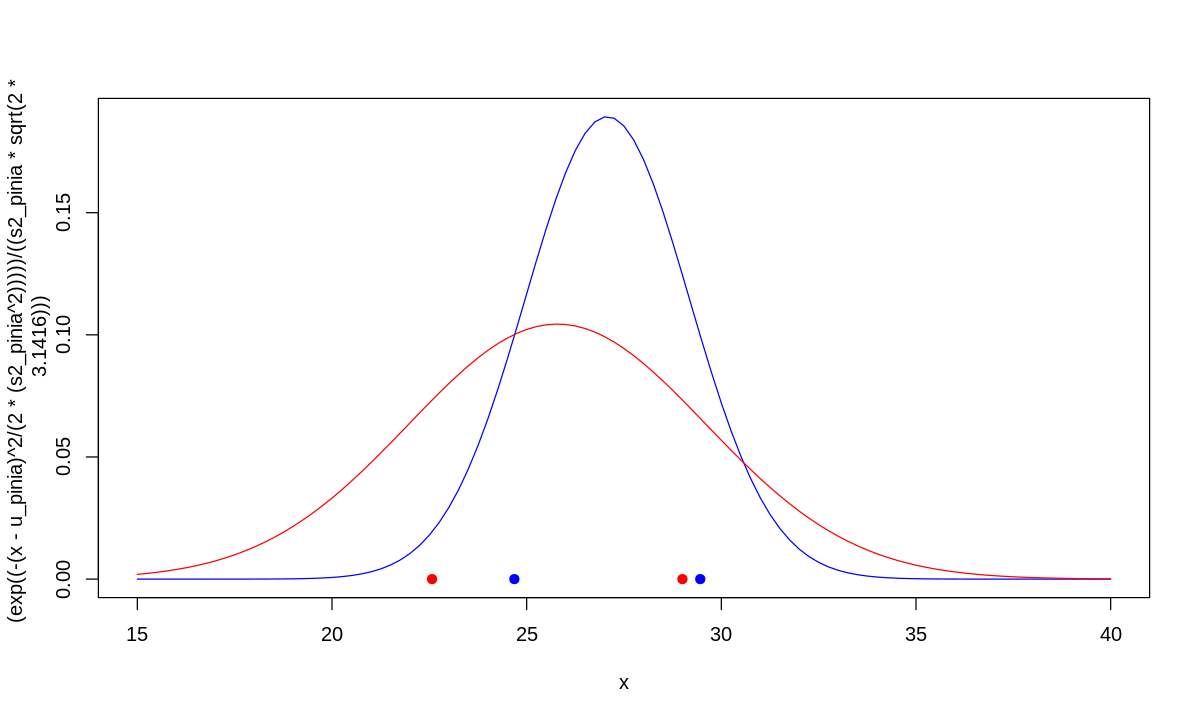

In [36]:
options(repr.plot.width=10, repr.plot.height=6)
curve((exp((-(x-u_pinia)**2/(2*(s2_pinia**2)))))/((s2_pinia*sqrt(2*3.1416))),15,40,col="blue")
curve((exp((-(x-u_nopinia)**2/(2*(s2_nopinia**2)))))/((s2_nopinia*sqrt(2*3.1416))),add=T,col="red")
points(c(lic_1_pinia,lic_2_pinia),c(0,0), col='blue',pch=19)
points(c(lic_1_nopinia,lic_2_nopinia),c(0,0), col='red',pch=19)

Dado que existe traslape entre los dos intervalos de confianza, no podemos decir que las dos distribuciones sean distintas. No existen diferencias significativas al 90% de confianza entre las tallas de calzado de la gente que le gusta la pizza con piña y la gente que no le gusta la pizza con piña en la población de mis amigos.

La forma estándar de llevar a cabo una comparación entre dos distribuciones (casi) normales es con la prueba de t, que usa la distribución t que es la normal ajustada al tamaño de muestra.

In [37]:
t.test(talla_pinia, talla_nopinia)


	Welch Two Sample t-test

data:  talla_pinia and talla_nopinia
t = 1.5993, df = 8.3239, p-value = 0.1469
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5556043  3.1270328
sample estimates:
mean of x mean of y 
 27.07143  25.78571 


Otra forma, más elegante, es usando el dataframe completo y haciendo un análisis de varianza y la prueba de Tukey como *post hoc*:

In [38]:
pinia_aov <- aov(Talla.de.calzado.en.centímetros.~X.Le.gusta.la.pizza.con.piña., data = cuest_def)
summary(pinia_aov)

                              Df Sum Sq Mean Sq F value Pr(>F)  
X.Le.gusta.la.pizza.con.piña.  1   8.68   8.679   3.468 0.0739 .
Residuals                     26  65.07   2.503                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [39]:
TukeyHSD(pinia_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Talla.de.calzado.en.centímetros. ~ X.Le.gusta.la.pizza.con.piña., data = cuest_def)

$X.Le.gusta.la.pizza.con.piña.
          diff        lwr      upr     p adj
Si-No 1.285714 -0.1335149 2.704944 0.0739203


Otra forma, aún más elegante (y oscura) es un modelo lineal:

In [40]:
pinia_lm <- lm(Talla.de.calzado.en.centímetros.~X.Le.gusta.la.pizza.con.piña., data = cuest_def)
summary(pinia_lm)


Call:
lm(formula = Talla.de.calzado.en.centímetros. ~ X.Le.gusta.la.pizza.con.piña., 
    data = cuest_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0714 -0.5714  0.3214  1.0000  2.9286 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      25.7857     0.5979  43.124   <2e-16 ***
X.Le.gusta.la.pizza.con.piña.Si   1.2857     0.6904   1.862   0.0739 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.582 on 26 degrees of freedom
Multiple R-squared:  0.1177,	Adjusted R-squared:  0.08374 
F-statistic: 3.468 on 1 and 26 DF,  p-value: 0.07392


Como pueden ver, en R ya se encuentran implementadas todas estas pruebas estadísticas y las sintaxis para llevarlas a cabo son sumamente sencillas. Si quisiéramos publicar estos análisis podríamos incluir esta bitácora como suplementario para que los árbitros (y otros investigadores interesados) puedan revisar cómodamente línea por línea como se llevaron a cabo.

Es importante tomar en cuenta que el hecho de que sea posible calcular todos estos análisis, no garantiza que los resultados sean válidos.

En primer lugar, todas estas pruebas tienen como supuesto que los datos tienen una distribución normal. Para estar seguros, podemos hacer una prueba de no normalidad como la prueba Shapiro-Wilk:

In [41]:
shapiro.test(cuest_def$Talla.de.calzado.en.centímetros.)


	Shapiro-Wilk normality test

data:  cuest_def$Talla.de.calzado.en.centímetros.
W = 0.88557, p-value = 0.00534


Hasta aquí llegamos con la introducción a R, aunque seguiremos descubriendo nuevas funciones implementadas en este lenguaje a lo largo del curso. Mi intención es que usemos esta herramienta para llevar a cabo ejercicios y que cuando me manden sus reportes, me pongan todos los comandos con comentarios (tal como yo se los he estado mandando en estas bitácoras) en archivos pdf.

## Tarea

Les pido que primero contesten el cuestionario adjunto de google forms y luego recreen estas comparaciones no solo con la talla del pie, sino con la edad y la estatura también. Entreguen las líneas de código usadas con comentarios y las figuras, todo en un archivo pdf (peguen la dirección url del archivo en google drive en la última pregunta del formulario).